In [5]:
# Set up cell
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/raw/raw_data.csv")

In [6]:

#df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/raw/raw_data.csv")
#df.head()  # First 5 rows
#df.tail()  # Last 5 rows
#dataShape = df.shape
#dataShape
df.info()     # Overview of column types and missing values
df.describe()   # Summary statistics for numeric columns
#df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891717 entries, 0 to 891716
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                891717 non-null  object 
 1   CRASH_DATE_EST_I               65905 non-null   object 
 2   CRASH_DATE                     891717 non-null  object 
 3   POSTED_SPEED_LIMIT             891717 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         891717 non-null  object 
 5   DEVICE_CONDITION               891717 non-null  object 
 6   WEATHER_CONDITION              891717 non-null  object 
 7   LIGHTING_CONDITION             891717 non-null  object 
 8   FIRST_CRASH_TYPE               891717 non-null  object 
 9   TRAFFICWAY_TYPE                891717 non-null  object 
 10  LANE_CNT                       199020 non-null  float64
 11  ALIGNMENT                      891717 non-null  object 
 12  ROADWAY_SURFACE_COND          

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,891717.000000,1.990200e+05,891717.000000,891712.000000,891717.000000,889753.000000,889753.000000,889753.000000,889753.000000,889753.000000,889753.000000,889753.0,891717.000000,891717.000000,891717.00000,885301.000000,885301.000000
mean,28.420895,1.332952e+01,3687.936826,1245.224842,2.035217,0.194038,0.001192,0.019785,0.108807,0.064254,2.001009,0.0,13.201723,4.121339,6.68842,41.855196,-87.673777
std,6.112300,2.961519e+03,2880.101978,704.866980,0.452031,0.572021,0.037478,0.164755,0.425238,0.325857,1.156814,0.0,5.573011,1.981363,3.36667,0.332151,0.674539
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.00000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1251.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.00000,41.783219,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.00000,41.874970,-87.674253
75%,30.000000,4.000000e+00,5561.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.00000,41.924548,-87.633591
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.00000,42.022780,0.000000


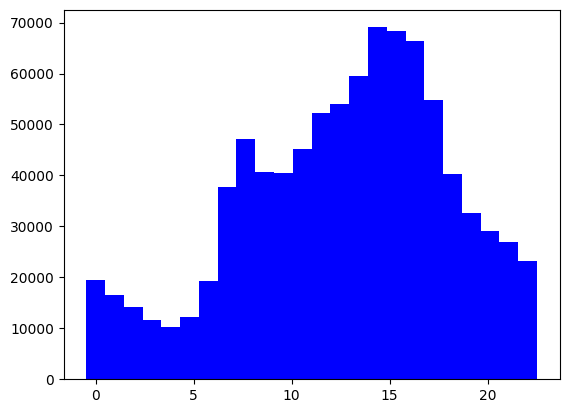

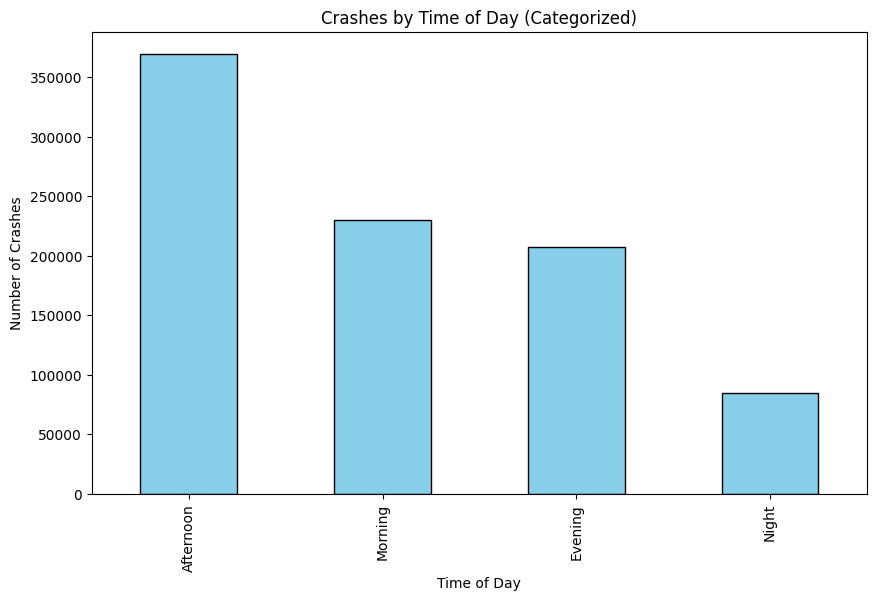

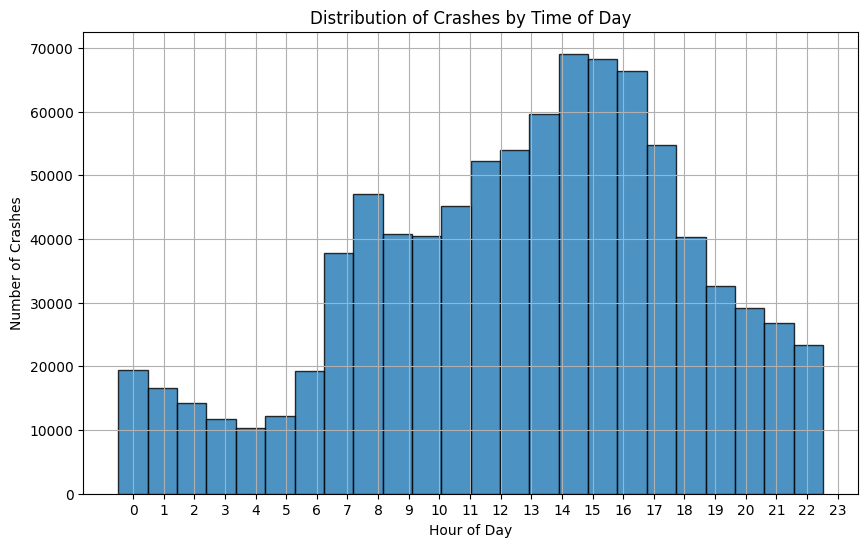

In [29]:
# Plot the distribution of 'CRASH_HOUR'
df['CRASH_HOUR'].hist(bins=24, grid=False, color='blue', align='left')

# Define a function to categorize the time of day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column for time of day
df['TIME_OF_DAY'] = df['CRASH_HOUR'].apply(time_of_day)

# Plot the distribution by categorized time of day
plt.figure(figsize=(10, 6))
df['TIME_OF_DAY'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Crashes by Time of Day (Categorized)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['CRASH_HOUR'], bins=24, edgecolor='black', alpha=0.8, align='left')
plt.title('Distribution of Crashes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

The histogram shows the frequency of crashes by hour of day. We see a large increase in the number of crashes around "rush hour", around the hours 2-6pm. Many people are commuting home from work during this time period. We also see an upward trend in crashes in the morning, around hours 7-10am. This increase compared to the early hours of the day again makes sense, due to the heavy increase in traffic for commuters on their way to work. The number of crashes during this timeframe 7-10am is similar to that during the 6-8pm timeframe. We can see a low number of crashes in the early hours of the day, from 12-5am. 

Questions from this initial histogram:
How well does time/hour of day predict the probability/the number of car crashes?

In [30]:
# Look at date values
#df['CRASH_DATE'].head()

# Convert 'CRASH_DATE' to datetime
df['CRASH_DATE_datetime'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_DATE_datetime'].head()

# Extract the year from 'CRASH_DATE'
#df['CRASH_DATE_year'] = df['CRASH_DATE_datetime'].dt.year
#df['CRASH_DATE_year'].head()

# Print unique values
#unique_years = df['CRASH_DATE_year'].unique()
#print("Unique years:", unique_years)


0   2023-08-18 12:50:00
1   2023-07-29 14:45:00
2   2023-08-18 17:58:00
3   2019-11-26 08:38:00
4   2023-08-18 10:45:00
Name: CRASH_DATE_datetime, dtype: datetime64[ns]